In [1]:
import pandas as pd
import seaborn as sns
from datetime import date, datetime
import math
import matplotlib.pyplot as plt

In [2]:
demand = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/capacity/demand.csv')
solar = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/capacity/solar.csv')
offshore = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/capacity/offshore.csv')
onshore = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/capacity/onshore.csv')

demand.head()

,Unnamed: 0,time,value,hour,month,dayofweek,dayofmonth,year,value-1,value-2,value-3,value-24,value-25,value-26,value-27,value-168,value-169,value-170,value-171,holiday
0,171,2011-06-03 19:00:00,33880.250000,19,6,4,3,2011,35690.250000,36978.333333,38135.416667,35907.000000,37420.250000,38815.583333,39945.250000,34741.166667,36146.333333,37497.583333,38649.090909,False
1,172,2011-06-03 20:00:00,33181.000000,20,6,4,3,2011,33880.250000,35690.250000,36978.333333,35405.833333,35907.000000,37420.250000,38815.583333,34722.666667,34741.166667,36146.333333,37497.583333,False
2,173,2011-06-03 21:00:00,33132.083333,21,6,4,3,2011,33181.000000,33880.250000,35690.250000,35090.250000,35405.833333,35907.000000,37420.250000,33434.833333,34722.666667,34741.166667,36146.333333,False
3,174,2011-06-03 22:00:00,30041.916667,22,6,4,3,2011,33132.083333,33181.000000,33880.250000,31313.083333,35090.250000,35405.833333,35907.000000,29708.750000,33434.833333,34722.666667,34741.166667,False
4,175,2011-06-03 23:00:00,27883.666667,23,6,4,3,2011,30041.916667,33132.083333,33181.000000,29467.250000,31313.083333,35090.250000,35405.833333,27410.000000,29708.750000,33434.833333,34722.666667,False


In [3]:
demand.time = pd.to_datetime(demand.time)

In [4]:
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
# seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 19))),
#            ('spring', (date(Y,  3, 20),  date(Y,  6, 20))),
#            ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
#            ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
#            ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

seasons = [('1', (date(Y,  4,  1),  date(Y,  4, 26))),
           ('2', (date(Y,  4, 27),  date(Y,  8, 16))),
           ('3', (date(Y,  8, 17),  date(Y,  9, 20))),
           ('4', (date(Y,  9, 21),  date(Y, 10, 25))),
           ('5', (date(Y,  10, 26),  date(Y, 12, 31))),
           ('6', (date(Y, 1, 1),  date(Y, 1, 24))),
           ('7', (date(Y, 1, 25),  date(Y, 3, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

print(get_season(date.today()))

7


In [5]:
demand['season'] = demand.time.map(lambda x: get_season(x))
demand

,Unnamed: 0,time,value,hour,month,dayofweek,dayofmonth,year,value-1,value-2,...,value-24,value-25,value-26,value-27,value-168,value-169,value-170,value-171,holiday,season
0,171,2011-06-03 19:00:00,33880.250000,19,6,4,3,2011,35690.250000,36978.333333,...,35907.000000,37420.250000,38815.583333,39945.250000,34741.166667,36146.333333,37497.583333,38649.090909,False,2
1,172,2011-06-03 20:00:00,33181.000000,20,6,4,3,2011,33880.250000,35690.250000,...,35405.833333,35907.000000,37420.250000,38815.583333,34722.666667,34741.166667,36146.333333,37497.583333,False,2
2,173,2011-06-03 21:00:00,33132.083333,21,6,4,3,2011,33181.000000,33880.250000,...,35090.250000,35405.833333,35907.000000,37420.250000,33434.833333,34722.666667,34741.166667,36146.333333,False,2
3,174,2011-06-03 22:00:00,30041.916667,22,6,4,3,2011,33132.083333,33181.000000,...,31313.083333,35090.250000,35405.833333,35907.000000,29708.750000,33434.833333,34722.666667,34741.166667,False,2
4,175,2011-06-03 23:00:00,27883.666667,23,6,4,3,2011,30041.916667,33132.083333,...,29467.250000,31313.083333,35090.250000,35405.833333,27410.000000,29708.750000,33434.833333,34722.666667,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,66502,2018-12-27 14:00:00,36784.750000,14,12,3,27,2018,36682.000000,36814.166667,...,32605.500000,32773.250000,32548.916667,31786.916667,39188.750000,38287.500000,38239.750000,38465.000000,False,5
65909,66503,2018-12-27 15:00:00,37835.750000,15,12,3,27,2018,36784.750000,36682.000000,...,33133.333333,32605.500000,32773.250000,32548.916667,40193.583333,39188.750000,38287.500000,38239.750000,False,5
65910,66504,2018-12-27 16:00:00,40393.583333,16,12,3,27,2018,37835.750000,36784.750000,...,35031.833333,33133.333333,32605.500000,32773.250000,42569.583333,40193.583333,39188.750000,38287.500000,False,5
65911,66505,2018-12-27 17:00:00,42150.583333,17,12,3,27,2018,40393.583333,37835.750000,...,36038.833333,35031.833333,33133.333333,32605.500000,44252.916667,42569.583333,40193.583333,39188.750000,False,5


In [6]:
def working_day_check(date):
    if date.holiday == True or date.dayofweek == 6:
        return "non_working_day"
    elif date.dayofweek in [0,1,2,3,4,5]:
        return "working_day"
    else:
        print("error")
    

demand['working_day'] = demand.apply(lambda x: working_day_check(x), axis=1)
demand

,Unnamed: 0,time,value,hour,month,dayofweek,dayofmonth,year,value-1,value-2,...,value-25,value-26,value-27,value-168,value-169,value-170,value-171,holiday,season,working_day
0,171,2011-06-03 19:00:00,33880.250000,19,6,4,3,2011,35690.250000,36978.333333,...,37420.250000,38815.583333,39945.250000,34741.166667,36146.333333,37497.583333,38649.090909,False,2,working_day
1,172,2011-06-03 20:00:00,33181.000000,20,6,4,3,2011,33880.250000,35690.250000,...,35907.000000,37420.250000,38815.583333,34722.666667,34741.166667,36146.333333,37497.583333,False,2,working_day
2,173,2011-06-03 21:00:00,33132.083333,21,6,4,3,2011,33181.000000,33880.250000,...,35405.833333,35907.000000,37420.250000,33434.833333,34722.666667,34741.166667,36146.333333,False,2,working_day
3,174,2011-06-03 22:00:00,30041.916667,22,6,4,3,2011,33132.083333,33181.000000,...,35090.250000,35405.833333,35907.000000,29708.750000,33434.833333,34722.666667,34741.166667,False,2,working_day
4,175,2011-06-03 23:00:00,27883.666667,23,6,4,3,2011,30041.916667,33132.083333,...,31313.083333,35090.250000,35405.833333,27410.000000,29708.750000,33434.833333,34722.666667,False,2,working_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,66502,2018-12-27 14:00:00,36784.750000,14,12,3,27,2018,36682.000000,36814.166667,...,32773.250000,32548.916667,31786.916667,39188.750000,38287.500000,38239.750000,38465.000000,False,5,working_day
65909,66503,2018-12-27 15:00:00,37835.750000,15,12,3,27,2018,36784.750000,36682.000000,...,32605.500000,32773.250000,32548.916667,40193.583333,39188.750000,38287.500000,38239.750000,False,5,working_day
65910,66504,2018-12-27 16:00:00,40393.583333,16,12,3,27,2018,37835.750000,36784.750000,...,33133.333333,32605.500000,32773.250000,42569.583333,40193.583333,39188.750000,38287.500000,False,5,working_day
65911,66505,2018-12-27 17:00:00,42150.583333,17,12,3,27,2018,40393.583333,37835.750000,...,35031.833333,33133.333333,32605.500000,44252.916667,42569.583333,40193.583333,39188.750000,False,5,working_day


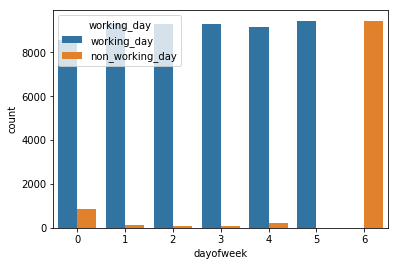

In [7]:
sns.countplot(data=demand, x='dayofweek', hue='working_day')

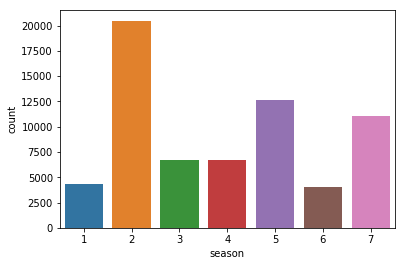

In [8]:
sns.countplot(data=demand, x='season')

## Machine Learning

In [9]:
import os.path
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '../../..'))
ROOT_DIR = os.path.join(os.path.dirname(os.path.realpath('__file__')), '')

from run.market_forecasting_comparison.munging.multi_step_forecasting_wrangling import multi_step_data_prep, get_hours_of_days_needed
# from run.market_forecasting_comparison.ML.EstimatorSelectionHelper import EstimatorSelectionHelper

import numpy as np

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit

In [11]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'llars': LassoLars(),
#     'ExtraTreesRegressor': ExtraTreesRegressor(),
#     'RandomForestRegressor': RandomForestRegressor(),
#     'AdaBoostRegressor': AdaBoostRegressor(),
#     'GradientBoostingRegressor': GradientBoostingRegressor(),
#     'SVR': SVR(),
#     "MLPRegressor": MLPRegressor(),
#     'KNeighborsRegressor': KNeighborsRegressor()
}

params = {
    'LinearRegression': {},
    'Lasso': {},
    'Ridge': {},
    'ElasticNet': {},
    'llars': {},
    'ExtraTreesRegressor': {'model__estimator__n_estimators': [32]},
    'RandomForestRegressor': {'model__estimator__n_estimators': [32]},
    'AdaBoostRegressor':  {'model__estimator__n_estimators': [32]},
    'GradientBoostingRegressor': {'model__estimator__n_estimators': [32], 'model__estimator__learning_rate': [0.8]},
    'SVR': [
        # {'model__estimator__kernel': ['linear'], 'model__estimator__C': [10]},
        {'model__estimator__kernel': ['rbf'], 'model__estimator__C': [10], 'model__estimator__gamma': [0.001]},
    ],
    'MLPRegressor': {"model__estimator__hidden_layer_sizes": [(1,), (50,)], "model__estimator__activation": ["tanh", "relu"], "model__estimator__solver": ["adam"], "model__estimator__alpha": [0.0005]},
    'KNeighborsRegressor': {'model__estimator__n_neighbors': [20]},
}

In [12]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, refit=True, scoring=None):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = MultiOutputRegressor(self.models[key])
            
            pipeline = self.make_pipeline(model)
            params = self.params[key]
            tscv = TimeSeriesSplit(n_splits=cv)

            gs = GridSearchCV(pipeline, params, cv=tscv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self):
        all_results = []
        for k in self.grid_searches:
            results = pd.DataFrame(self.grid_searches[k].cv_results_)
            results['estimator'] = k
            all_results.append(results)
        results_df = pd.concat(all_results)
        results_df = results_df.loc[:,~results_df.columns.str.contains('train')] 

        return results_df
    
    def make_pipeline(self, model):
        steps = list()
        steps.append(('standardize', StandardScaler()))
        steps.append(('normalize', MinMaxScaler()))
        steps.append(('model', model))
        # create pipeline
        pipeline = Pipeline(steps=steps)
        return pipeline


In [13]:
def run_ml(dat):
    y = dat.filter(like='value').values
    final_year = dat[dat.year>2016].filter(regex='^(?!.*value).*$').values.astype(np.float32)
    print(len(final_year))
    
    X = dat.filter(regex='^(?!.*value).*$').values.astype(np.float32)

    helper1 = EstimatorSelectionHelper(models, params)
    # helper1.fit(X, y, n_jobs=-1, cv=5, refit=False)
    helper1.fit(X, y, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, refit=True, verbose=1)
    return helper1, final_year
#     res = helper1.score_summary()    

#     return res


In [14]:
demand = pd.read_csv('{}/../data/capacity/demand.csv'.format(ROOT_DIR))

demand = demand[demand.time < '2018']


prev_days_needed = get_hours_of_days_needed(days_wanted=[1, 2, 7, 30], hours_wanted=[28, 28, 28, 28, 28])
multi_step_dat = multi_step_data_prep(dat=demand, input_lags=prev_days_needed, outputs=24)
multi_step_dat.time = pd.to_datetime(multi_step_dat.time)
multi_step_dat['season'] = multi_step_dat.time.map(lambda x: get_season(x))

multi_step_dat['working_day'] = multi_step_dat.apply(lambda x: working_day_check(x), axis=1)

multi_step_dat = multi_step_dat.drop(columns=['time', 'Unnamed: 0'])

multi_step_dat


,value,hour,month,dayofweek,dayofmonth,year,holiday,value-1,value-2,value-3,...,n-740,n-741,n-742,n-743,n-744,n-745,n-746,n-747,season,working_day
770,34214.583333,21,7,1,5,2011,False,35869.833333,37017.666667,38274.583333,...,25302.750000,26183.750000,26950.916667,27883.666667,30041.916667,33132.083333,33181.000000,33880.250000,2,working_day
771,30264.500000,22,7,1,5,2011,False,34214.583333,35869.833333,37017.666667,...,24665.833333,25302.750000,26183.750000,26950.916667,27883.666667,30041.916667,33132.083333,33181.000000,2,working_day
772,28211.333333,23,7,1,5,2011,False,30264.500000,34214.583333,35869.833333,...,24041.250000,24665.833333,25302.750000,26183.750000,26950.916667,27883.666667,30041.916667,33132.083333,2,working_day
773,27015.750000,0,7,2,6,2011,False,28211.333333,30264.500000,34214.583333,...,25311.166667,24041.250000,24665.833333,25302.750000,26183.750000,26950.916667,27883.666667,30041.916667,2,working_day
774,26275.750000,1,7,2,6,2011,False,27015.750000,28211.333333,30264.500000,...,27123.500000,25311.166667,24041.250000,24665.833333,25302.750000,26183.750000,26950.916667,27883.666667,2,working_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57294,35223.666667,19,12,6,31,2017,False,37531.583333,38381.416667,36561.083333,...,33061.833333,34133.916667,37765.500000,42847.250000,45969.416667,48157.916667,49271.000000,49574.833333,5,non_working_day
57295,32496.500000,20,12,6,31,2017,False,35223.666667,37531.583333,38381.416667,...,32920.250000,33061.833333,34133.916667,37765.500000,42847.250000,45969.416667,48157.916667,49271.000000,5,non_working_day
57296,29994.250000,21,12,6,31,2017,False,32496.500000,35223.666667,37531.583333,...,31417.583333,32920.250000,33061.833333,34133.916667,37765.500000,42847.250000,45969.416667,48157.916667,5,non_working_day
57297,27789.500000,22,12,6,31,2017,False,29994.250000,32496.500000,35223.666667,...,31130.750000,31417.583333,32920.250000,33061.833333,34133.916667,37765.500000,42847.250000,45969.416667,5,non_working_day


In [15]:
split_up_results = multi_step_dat.groupby(['season','working_day']).apply(run_ml)
split_up_results

144
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


480
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


432
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 23 iterations, i.e. alpha=1.523e+00, with an active set of 19 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 24 iterations, i.e. alpha=1.511e+00, with an active set of 20 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set

2256
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.4s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished


144
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=8.560e+00, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=1.129e+01, with an active set of 8 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set 

696
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


120
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


720
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


288
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


1320
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.2s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


114
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha

Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Running GridSearchCV for llars.


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


450
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


216
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


1362
Running GridSearchCV for LinearRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


Running GridSearchCV for Lasso.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished


Running GridSearchCV for Ridge.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


Running GridSearchCV for llars.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


season  working_day    
1       non_working_day    (<__main__.EstimatorSelectionHelper object at ...
        working_day        (<__main__.EstimatorSelectionHelper object at ...
2       non_working_day    (<__main__.EstimatorSelectionHelper object at ...
        working_day        (<__main__.EstimatorSelectionHelper object at ...
3       non_working_day    (<__main__.EstimatorSelectionHelper object at ...
        working_day        (<__main__.EstimatorSelectionHelper object at ...
4       non_working_day    (<__main__.EstimatorSelectionHelper object at ...
        working_day        (<__main__.EstimatorSelectionHelper object at ...
5       non_working_day    (<__main__.EstimatorSelectionHelper object at ...
        working_day        (<__main__.EstimatorSelectionHelper object at ...
6       non_working_day    (<__main__.EstimatorSelectionHelper object at ...
        working_day        (<__main__.EstimatorSelectionHelper object at ...
7       non_working_day    (<__main__.EstimatorSelec

In [16]:

scores = pd.concat([result.score_summary() for result, _ in split_up_results])
scores.groupby('estimator')['mean_test_score'].mean()

estimator
ElasticNet          -3081.873511
Lasso               -2399.301510
LinearRegression   -55714.593690
Ridge               -2258.131337
llars              -21350.915549
Name: mean_test_score, dtype: float64

In [17]:
def predict_next_day(model, data):
    results = model.predict(data)
    return results


def get_differences_df(dat, name):
    helper1 = dat.iloc[0,0][0]
    X = multi_step_dat[(multi_step_dat.year==2017) & (multi_step_dat.season==name[0]) & (multi_step_dat.working_day==name[1])].filter(regex='^(?!.*value|working|season).*$').values.astype(np.float32)
    actuals = multi_step_dat[(multi_step_dat.year==2017) & (multi_step_dat.season==name[0]) & (multi_step_dat.working_day==name[1])].filter(like='value').values
    
    model = helper1.grid_searches['llars'].best_estimator_

    all_differences_list = []
    for day in range(math.ceil(len(X)/24)):

        entire_data = X[day].reshape(1,-1)
        predicted = predict_next_day(model, entire_data)[0]

        actual = actuals[day]#.reshape(1,-1)

        differences = predicted - actual
        all_differences_list.append(differences)
        plotting_data = pd.DataFrame({"actual":actual, "predicted":predicted, 'hour':range(24)}).melt(id_vars="hour", value_vars=['actual','predicted'])
#         sns.lineplot(data=plotting_data, x='hour', y='value', hue='variable')
#         plt.show()

    flattened_differences = np.concatenate(all_differences_list, axis=0)

    differences_dataframe = pd.DataFrame({'differences':flattened_differences})
    return differences_dataframe
# sns.distplot(differences_dataframe.differences)

In [18]:
differences = split_up_results.to_frame().groupby(['season','working_day']).apply(lambda x: get_differences_df(x, x.name))
differences

differences
season working_day                      
1      non_working_day 0    -6107.752280
                       1    -5983.956059
                       2    -4366.806035
                       3    -1596.255116
                       4     1198.524501
...                                  ...
7      working_day     1363 -5636.620356
                       1364 -5915.938867
                       1365 -5249.374616
                       1366 -3640.902291
                       1367 -2496.989699

[8760 rows x 1 columns]

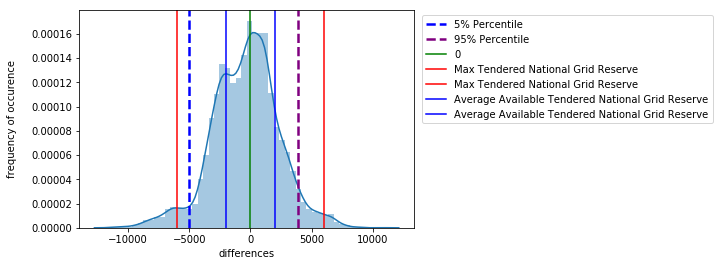

In [24]:
# type(differences)
# pd.concat(differences)
# dat = []
# for i in differences:
#     dat.append(i)

# multi_differences = pd.concat(dat)


multi_differences = differences
sns.distplot(multi_differences.differences)
plt.axvline(x=multi_differences.differences.quantile(0.05), linestyle='--', linewidth=2.5, label="5% Percentile", c='b')
plt.axvline(x=multi_differences.differences.quantile(0.95), linestyle='--', linewidth=2.5, label="95% Percentile", c='purple')
plt.ylabel("frequency of occurence", labelpad=14)
plt.axvline(x=0, label="0", c='g')
plt.axvline(x=-6000, label="Max Tendered National Grid Reserve", c='r')
plt.axvline(x=6000, label="Max Tendered National Grid Reserve", c='r')
plt.axvline(x=-2000, label="Average Available Tendered National Grid Reserve", c='b')
plt.axvline(x=2000, label="Average Available Tendered National Grid Reserve", c='b')

plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");


In [20]:
one_model = pd.read_csv('/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/prediction_errors/one_model.csv')
one_model

,Unnamed: 0,differences
0,0,-51.730469
1,1,727.697266
2,2,837.953125
3,3,205.442708
4,4,-814.247396
...,...,...
8755,8755,-1572.792318
8756,8756,-733.628906
8757,8757,-310.317708
8758,8758,-111.807292


In [21]:
# multi_differences
# one_model

dat = pd.DataFrame({"multi_model_diff":multi_differences.reset_index(drop=True).differences, "single_model_diff": one_model.iloc[:8376].reset_index(drop=True).differences})


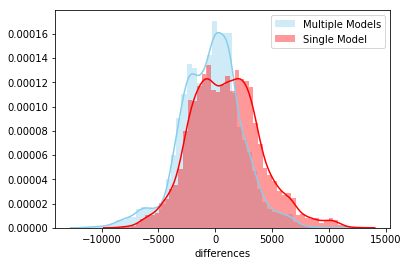

In [22]:
sns.distplot(multi_differences["differences"] , color="skyblue", label="Multiple Models")
sns.distplot(one_model["differences"] , color="red", label="Single Model")
plt.legend()


In [23]:
np.mean(multi_differences.differences.abs())

2109.994511107183